In [1]:
# load packages
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
np.random.seed(420)

In [2]:
data = np.load('megmag_data.npy') 
y = np.load('pas_vector.npy') # load data

In [3]:
def equalize_targets(data, y):
    np.random.seed(7)
    targets = np.unique(y)
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target))
        indices.append(np.where(y == target)[0])
    min_count = np.min(counts)
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count, replace=False)
    third_choice = np.random.choice(indices[2], size=min_count, replace=False)
    fourth_choice = np.random.choice(indices[3], size=min_count, replace=False)
    
    new_indices = np.concatenate((first_choice, second_choice,
                                 third_choice, fourth_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y
  
equalized = equalize_targets(data, y)
X_equal = equalized[0]
y_equal = equalized[1]

In [4]:
times = np.arange(-200, 804, 4)
index_248ms = np.where(times == 248)
X_248ms = X_equal[:, :, index_248ms[0]]
X_248ms = np.reshape(X_248ms, (396, 102)) # the shape was a bit weird, had to remove an extra dimension with no values

In [5]:
sc = StandardScaler()
X_248ms_std = sc.fit_transform(X_248ms)

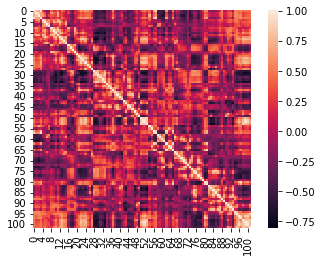

In [6]:
covmat = np.cov(X_248ms_std, rowvar = False)

plt.figure()
sns.heatmap(covmat, square = True) # makes sure the matrix is not all squishy squishy
plt.show()